<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Параметр-class_weight-для-борьбы-с-дисбалансом" data-toc-modified-id="Параметр-class_weight-для-борьбы-с-дисбалансом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Параметр class_weight для борьбы с дисбалансом</a></span></li><li><span><a href="#Уменьшение-выборки-для-борьбы-с-дисбалансом" data-toc-modified-id="Уменьшение-выборки-для-борьбы-с-дисбалансом-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки для борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с значением *F1*-меры > 0.59.  

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

In [2]:
# сбросим ограничение на количество выводимых столбцов, для просмотра всех столбцов
pd.set_option('display.max_columns', None)

In [3]:
# уберем экспонентациальные формы при выводе данных
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
# отключим некритические предупреждения
warnings.filterwarnings("ignore")

In [5]:
# прочитаем файл и сохраним в df
df = pd.read_csv('datasets/Churn.csv',index_col=0)

In [6]:
# выведем первые 5 строк df
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [7]:
# проверим общую информацию данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [8]:
# приведем наименования столбцов к общему виду
df.rename(columns = {'CustomerId':'Customer_id', 'CreditScore':'Credit_score', 'NumOfProducts':'Num_of_products', 
                     'HasCrCard':'Has_cr_card', 'IsActiveMember':'Is_active_member',
                     'EstimatedSalary':'Estimated_salary'}, inplace = True )

In [9]:
df.columns.tolist()

['Customer_id',
 'Surname',
 'Credit_score',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'Num_of_products',
 'Has_cr_card',
 'Is_active_member',
 'Estimated_salary',
 'Exited']

In [10]:
# удалим колонки Customer_id,Surname. Так как id и фамилия клиента совершенно не влияют на факт ухода клиента
df.drop(columns=['Customer_id','Surname'],axis=1,inplace=True)

In [11]:
# определим, в каких столбцах есть пропуски
df.isna().sum().sort_values()

Credit_score          0
Geography             0
Gender                0
Age                   0
Balance               0
Num_of_products       0
Has_cr_card           0
Is_active_member      0
Estimated_salary      0
Exited                0
Tenure              909
dtype: int64

In [12]:
# Применим one hot encoding к датафрейму, избежав "ловушку фиктивных признаков"
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,Credit_score,Age,Tenure,Balance,Num_of_products,Has_cr_card,Is_active_member,Estimated_salary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
2,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
3,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
4,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
5,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0


In [13]:
# посмотрим значения по столбцу Tenure
df_ohe['Tenure'].value_counts()

1.00     952
2.00     950
8.00     933
3.00     928
5.00     927
7.00     925
4.00     885
9.00     882
6.00     881
10.00    446
0.00     382
Name: Tenure, dtype: int64

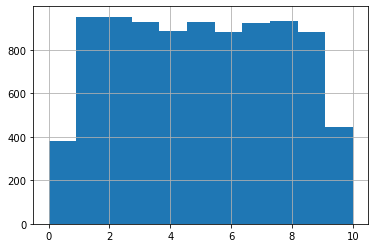

In [14]:
# построим гистограмму по столбцу Tenure
df_ohe['Tenure'].hist(bins=11)
plt.show()

В связи с тем, что природа пропусков неизвестна - заполним медианным значением.

In [15]:
df_ohe['Tenure'].fillna(df_ohe['Tenure'].median(), inplace = True)

In [16]:
df_ohe['Tenure'].value_counts()

5.00     1836
1.00      952
2.00      950
8.00      933
3.00      928
7.00      925
4.00      885
9.00      882
6.00      881
10.00     446
0.00      382
Name: Tenure, dtype: int64

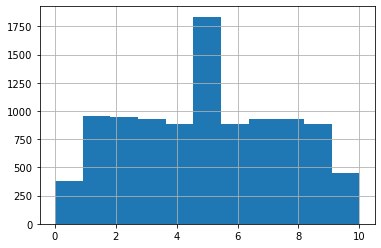

In [17]:
# Посмотрим повторно гистограмму по столбцу Tenure
df_ohe['Tenure'].hist(bins=11)
plt.show()

In [18]:
# Проверим пропущенные значения
df_ohe.isna().sum()

Credit_score         0
Age                  0
Tenure               0
Balance              0
Num_of_products      0
Has_cr_card          0
Is_active_member     0
Estimated_salary     0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [19]:
# Создадим список с числовыми столбцами
numeric = ['Credit_score','Age','Balance','Num_of_products','Estimated_salary','Tenure']

In [20]:
# посмотрим корреляцию факторов
df_ohe.loc[:,numeric].corr().style.applymap(lambda x: f"color: {'red' if (abs(x) > 0.5  and x !=1) else 'black'}")

,Credit_score,Age,Balance,Num_of_products,Estimated_salary,Tenure
Credit_score,1.000000,-0.003965,0.006268,0.012238,-0.001384,-0.000060
Age,-0.003965,1.000000,0.028308,-0.030680,-0.007201,-0.012606
Balance,0.006268,0.028308,1.000000,-0.304180,0.012797,-0.007535
Num_of_products,0.012238,-0.030680,-0.304180,1.000000,0.014204,0.011409
Estimated_salary,-0.001384,-0.007201,0.012797,0.014204,1.000000,0.010049
Tenure,-0.000060,-0.012606,-0.007535,0.011409,0.010049,1.000000


Корреляции между числовыми столбцами не обнаружено, самое больше значение 0,3 это корреляция между Количеством продуктов и балансом на счете.

In [21]:
# Проверим наличие аномальных значений по числовым столбцам
df_ohe[numeric].describe()

,Credit_score,Age,Balance,Num_of_products,Estimated_salary,Tenure
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,"76,485.89",1.53,"100,090.24",5.00
std,96.65,10.49,"62,397.41",0.58,"57,510.49",2.76
min,350.00,18.00,0.00,1.00,11.58,0.00
25%,584.00,32.00,0.00,1.00,"51,002.11",3.00
50%,652.00,37.00,"97,198.54",1.00,"100,193.91",5.00
75%,718.00,44.00,"127,644.24",2.00,"149,388.25",7.00
max,850.00,92.00,"250,898.09",4.00,"199,992.48",10.00


**Описание данных:** 
- RowNumber — индекс строки в данных
- Customer_id — уникальный идентификатор клиента
- Surname — фамилия
- Credit_score — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- Num_of_products — количество продуктов банка, используемых клиентом
- Has_cr_card — наличие кредитной карты
- Is_active_member — активность клиента
- Estimated_salary — предполагаемая зарплата

**Целевой признак:** 
- Exited — факт ухода клиента

**Выводы:**

Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Всего в таблице 13 столбцов и 10 000 строк. Привели наименования столбцов к змеиному регистру. Для корректного анализа заменили пропуски в столбце Tenure медианой. Применили One hot encoding к датафрейму, для избежания "ловушки фиктивных признаков". Удалили колонки Customer_id, Surname - так как эти данные не влияют на факт ухода клиента из банка. Корреляции между числовыми столбцами не обнаружено, все числовые столбцы оставляем для обучения модели. 

## Исследование задачи

In [22]:
# Выделем целевой столбец
target = df_ohe['Exited']

In [23]:
# Выделем датафрейм признаков  
features = df_ohe.drop('Exited', axis=1)

In [24]:
# разделим все данные на тестовую и обучающую выборку
# В связи с применением GridSearchCV выделять валидационную выборку отдельно нет необходимости
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [25]:
# Нормируем числовые данные, используя StandardScaler
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_test.shape)

(7500, 11)
(2500, 11)


In [26]:
# Посмотрим количество объектов отрицательного и положительно класса
features[target == 0].shape, features[target == 1].shape

((7963, 11), (2037, 11))

Наблюдается дисбаланс классов, объектов отрицательного класса почти в 4 раза больше, чем объектов положительного. Рассчитаем базовые модели на несбалансированных данных.

In [27]:
# Обучим базовую модель "Логистическая регрессия" и посчитаем метрики на тестовой выборке
model_base_lgr = LogisticRegression(random_state=12345, solver='liblinear')
model_base_lgr.fit(features_train, target_train)
predicted_test = model_base_lgr.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.2948539638386648
ROC_auc: 0.5792180923164728


In [28]:
# Подберем оптимальные параметры для модели "Случайный лес"
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20]
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [29]:
# Обучим модель "Случайный лес" с лучшими гиперпараметрами и рассчитаем метрики на тестовой выборке
model_base_rfc = clf_rfc.best_estimator_.fit(features_train, target_train)
predicted_test = model_base_rfc.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5754716981132074
ROC_auc: 0.7104801312691731


In [30]:
# Подберем оптимальные параметры для модели "Градиентный бустинг"
parameters = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5,10,20],
}

gbc = GradientBoostingClassifier(random_state=12345)

clf_gbc = GridSearchCV(
    estimator = gbc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)
    
clf_gbc.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [31]:
# Обучим модель "Градиентный бустинг" с лучшими гиперпараметрами и рассчитаем метрики на тестовой выборке
model_base_gbc = clf_gbc.best_estimator_.fit(features_train, target_train)
predicted_test = model_base_gbc.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.6176808266360506
ROC_auc: 0.7343535231028988


In [32]:
# Рассчитаем оптимальный порог классификации для модели "Логистическая регрессия" 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.215, Полнота = 1.000, F1 = 0.355, ROC_auc = 0.504
Порог = 0.04 | Точность = 0.225, Полнота = 0.981, F1 = 0.366, ROC_auc = 0.531
Порог = 0.06 | Точность = 0.243, Полнота = 0.953, F1 = 0.387, ROC_auc = 0.573
Порог = 0.08 | Точность = 0.263, Полнота = 0.933, F1 = 0.411, ROC_auc = 0.611
Порог = 0.10 | Точность = 0.283, Полнота = 0.895, F1 = 0.430, ROC_auc = 0.639
Порог = 0.12 | Точность = 0.304, Полнота = 0.852, F1 = 0.448, ROC_auc = 0.661
Порог = 0.14 | Точность = 0.328, Полнота = 0.821, F1 = 0.468, ROC_auc = 0.681
Порог = 0.16 | Точность = 0.347, Полнота = 0.781, F1 = 0.480, ROC_auc = 0.690
Порог = 0.18 | Точность = 0.367, Полнота = 0.750, F1 = 0.493, ROC_auc = 0.699
Порог = 0.20 | Точность = 0.387, Полнота = 0.707, F1 = 0.500, ROC_auc = 0.701
Порог = 0.22 | Точность = 0.407, Полнота = 0.667, F1 = 0.505, ROC_auc = 0.701
Порог = 0.24 | Точность = 0.419, Полнота = 0.630, F1 = 0.503, RO

In [33]:
# Рассчитаем оптимальный порог классификации для модели "Градиентный бустинг"

probabilities_test = model_base_gbc.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.235, Полнота = 0.987, F1 = 0.380, ROC_auc = 0.557
Порог = 0.04 | Точность = 0.281, Полнота = 0.970, F1 = 0.435, ROC_auc = 0.646
Порог = 0.06 | Точность = 0.320, Полнота = 0.936, F1 = 0.476, ROC_auc = 0.697
Порог = 0.08 | Точность = 0.361, Полнота = 0.895, F1 = 0.515, ROC_auc = 0.732
Порог = 0.10 | Точность = 0.396, Полнота = 0.865, F1 = 0.543, ROC_auc = 0.753
Порог = 0.12 | Точность = 0.428, Полнота = 0.839, F1 = 0.567, ROC_auc = 0.767
Порог = 0.14 | Точность = 0.457, Полнота = 0.817, F1 = 0.586, ROC_auc = 0.776
Порог = 0.16 | Точность = 0.486, Полнота = 0.802, F1 = 0.606, ROC_auc = 0.786
Порог = 0.18 | Точность = 0.512, Полнота = 0.779, F1 = 0.618, ROC_auc = 0.788
Порог = 0.20 | Точность = 0.537, Полнота = 0.755, F1 = 0.628, ROC_auc = 0.789
Порог = 0.22 | Точность = 0.561, Полнота = 0.729, F1 = 0.634, ROC_auc = 0.787
Порог = 0.24 | Точность = 0.583, Полнота = 0.703, F1 = 0.637, RO

**Вывод**

- Базовая модель "Логистическая регрессия" на тестовых данных показала результат по f1 = 0,29  и roc_auc = 0,58.
- Модель "Случайный лес" на тестовых данных f1=0,58 и roc_auc=0,71.
- Модель "Градиентный бустинг" на тестовых данных f1=0,59 и roc_auc=0,72.
- При изменении порога классификации в модели "Логистическая регрессия" оптимальные значений метрик составляют f1 = 0.507, roc_auc = 0.702 при пороге =0,22.
- При изменении порога классификации "Градиентный бустинг" на тестовых данных при пороге 0,2 дает результат 0,638 и 0,798. 

**Таким образом, лучший результат на текущих обучающих данных без борьбы с дисбалансом классов получены моделью "Градиентный бустинг"**

## Борьба с дисбалансом

In [34]:
# количество объектов отрицательного класса
features_zeros = features[target == 0]
features_zeros.shape

(7963, 11)

In [35]:
# количество объектов положительного класса
features_ones = features[target == 1]
features_ones.shape

(2037, 11)

Объектов отрицательно класса почти в четыре раза больше, чем объектов положительного класса. Изучим разные методы борьбы с дисбалансом классов и выберем оптимальную модель и оптимальный метод корректировки дисбаланса классов.

### Параметр class_weight для борьбы с дисбалансом

In [36]:
# Рассчитаем модель "Логистическая регрессия" с параметром class_weight = 'balanced'

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5050234427327529
ROC_auc: 0.7044992984709044


In [37]:
# Рассчитаем оптимальный порог классификации для "Логистическая регрессия" с параметром class_weight = 'balanced'

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.04 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.06 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.501
Порог = 0.08 | Точность = 0.216, Полнота = 1.000, F1 = 0.355, ROC_auc = 0.506
Порог = 0.10 | Точность = 0.218, Полнота = 0.998, F1 = 0.358, ROC_auc = 0.512
Порог = 0.12 | Точность = 0.221, Полнота = 0.993, F1 = 0.362, ROC_auc = 0.521
Порог = 0.14 | Точность = 0.225, Полнота = 0.987, F1 = 0.367, ROC_auc = 0.532
Порог = 0.16 | Точность = 0.229, Полнота = 0.974, F1 = 0.371, ROC_auc = 0.541
Порог = 0.18 | Точность = 0.235, Полнота = 0.968, F1 = 0.379, ROC_auc = 0.556
Порог = 0.20 | Точность = 0.240, Полнота = 0.955, F1 = 0.384, ROC_auc = 0.567
Порог = 0.22 | Точность = 0.249, Полнота = 0.946, F1 = 0.394, ROC_auc = 0.584
Порог = 0.24 | Точность = 0.259, Полнота = 0.940, F1 = 0.406, RO

In [38]:
# Подберем оптимальные параметры для модели "Случайный лес" с параметром class_weight = 'balanced'
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20],    
    'class_weight' : ['balanced']
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc_b = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc_b.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [39]:
# Обучим модель "Случайный лес" с лучшими гиперпараметрами и с параметром class_weight = 'balanced'. 
# Рассчитаем метрики на тестовой выборке

model_rfc_b = clf_rfc_b.best_estimator_.fit(features_train, target_train)
predicted_test = model_rfc_b.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.64
ROC_auc: 0.7747734893343796


In [40]:
# Рассчитаем оптимальный порог классификации для "Случайный лес" с параметром  class_weight = 'balanced'

probabilities_test = model_rfc_b.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_test = probabilities_one_test > threshold 
    precision = precision_score(target_test,predicted_test) 
    recall = recall_score(target_test,predicted_test) 
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}, ROC_auc = {:.3f}".format(
        threshold, precision, recall, f1_score(target_test, predicted_test), roc_auc_score(target_test, predicted_test)))

Порог = 0.00 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.500
Порог = 0.02 | Точность = 0.214, Полнота = 1.000, F1 = 0.353, ROC_auc = 0.501
Порог = 0.04 | Точность = 0.218, Полнота = 0.998, F1 = 0.358, ROC_auc = 0.512
Порог = 0.06 | Точность = 0.231, Полнота = 0.996, F1 = 0.374, ROC_auc = 0.545
Порог = 0.08 | Точность = 0.240, Полнота = 0.981, F1 = 0.385, ROC_auc = 0.567
Порог = 0.10 | Точность = 0.254, Полнота = 0.979, F1 = 0.403, ROC_auc = 0.598
Порог = 0.12 | Точность = 0.266, Полнота = 0.970, F1 = 0.417, ROC_auc = 0.620
Порог = 0.14 | Точность = 0.280, Полнота = 0.963, F1 = 0.434, ROC_auc = 0.645
Порог = 0.16 | Точность = 0.294, Полнота = 0.957, F1 = 0.450, ROC_auc = 0.666
Порог = 0.18 | Точность = 0.312, Полнота = 0.948, F1 = 0.469, ROC_auc = 0.689
Порог = 0.20 | Точность = 0.326, Полнота = 0.936, F1 = 0.484, ROC_auc = 0.705
Порог = 0.22 | Точность = 0.338, Полнота = 0.920, F1 = 0.494, ROC_auc = 0.714
Порог = 0.24 | Точность = 0.356, Полнота = 0.905, F1 = 0.511, RO

**Вывод**

При применении гиперпараметра class_weight = 'balanced' для борьбы с дисбалансом классов:
- модель "Логистическая регрессия" показала результат на тестовой выборке по f1=0.51 и roc_auc=0.71, что значительно лучше, чем без данного гиперпараметра;
- модель "Случайный лес" показала результат на тестовой выборке по f1=0.64 и roc_auc=0.78. Результат по метрикам "Случайный лес" так же лучше результат, чем без применения гиперпараметра class_weight = 'balanced'(в модели без данного гиперпараметра f1=0.58 и roc_auc=0.71). 

При изменении порога модель "Случайный лес" показала лучший результат при пороге=0,42 f1=0.643 и roc_auc=0.799


### Уменьшение выборки для борьбы с дисбалансом

In [41]:
# Создадим функцию,которая принимает на вход : датафрейм признаков, целевые значения, долю
# более многочисленного класса, что бы выборка стала сбалансированной
# результат функции : уменьшена исходная выборка со сбалансированными классами: датафрейм признаков и целевые значения
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)    
    return features_downsampled, target_downsampled

In [42]:
# признаки и целевое значение уменьшенной обучающей выборки
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Далее обучим модели "Логистическая регрессия", "Градиентный бустинг" и "Случайный лес" на признаках уменьшенной обучающей выборки, и рассчитаем метрики f1 и roc_auc

In [43]:
# Обучим модель "Логистическая регрессия" по уменьшенной сбалансированной выборке и посчитаем метрики на тестовой выборке
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_downsampled,target_downsampled)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.5110073382254836
ROC_auc: 0.7101067751064185


In [44]:
# Подберем оптимальные параметры для модели "Случайный лес" по уменьшенной сбалансированной выборке
parameters = {
    'n_estimators' : [25,50,100,150],
    'criterion' : ['gini', 'entropy'],
    'max_depth':[5,10,20],
}

rfc = RandomForestClassifier(random_state=12345)

clf_rfc_downsampled = GridSearchCV(
    estimator = rfc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)

clf_rfc_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='f1')

In [45]:
# Обучим модель "Случайный лес" с лучшими гиперпараметрами по уменьшенной сбалансированной выборке. 

model_rfc_downsampled = clf_rfc_downsampled.best_estimator_.fit(features_downsampled,target_downsampled)
predicted_test = model_rfc_downsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.6161764705882353
ROC_auc: 0.7882808970060166


In [46]:
# Подберем оптимальные параметры для модели "Градиентный бустинг" по уменьшенной сбалансированной выборке
parameters = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5,10,20],
}

gbc = GradientBoostingClassifier(random_state=12345)

clf_gbc_downsampled = GridSearchCV(
    estimator = gbc,
    param_grid = parameters,
    scoring = 'f1',
    cv=5)
    
clf_gbc_downsampled.fit(features_downsampled,target_downsampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [47]:
# Обучим модель "Градиентный бустинг" с лучшими гиперпараметрами по уменьшенной сбалансированной выборке. 

model_gbc_downsampled = clf_gbc_downsampled.best_estimator_.fit(features_downsampled,target_downsampled)
predicted_test = model_gbc_downsampled.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))
print("ROC_auc:", roc_auc_score(target_test, predicted_test))

F1: 0.6207407407407407
ROC_auc: 0.790825426268103


**Вывод**

При уменьшении выборки для борьбы с дисбалансом классов:
- метрики модели "Логистическая регрессия" составили f1=0.51 и roc_auc=0.71, данный результат полностью соответствует результатам, полученным при применении гиперпараметра class_weight = 'balanced' и при применении метода увеличения обучающей выборки для логистической регрессии;
- метрики модели "Случайный лес" составили f1=0.61 и roc_auc=0.78, данный результат незначительно хуже по параметру f1 и лучше по параметру roc_auc, полученному при применении гиперпараметра class_weight = 'balanced' для случайного леса(0,64 и 0,78 соответственно);
- метрики модели "Градиентный бустинг" обученный на уменьшенной выборке, показал на тестовых данных результат по f1=0.62 и roc_auc=0.79, что является лучшем результатом по модели "Градиентный бустинг".

## Тестирование модели

Создадим константную модель: любому объекту она прогнозирует класс «1».

In [48]:
target_pred_constant =[int(i) for i in '1'*df_ohe['Exited'].shape[0]]

In [49]:
print("precision:", precision_score(target, target_pred_constant))
print("recall:", recall_score(target, target_pred_constant))
print("F1:", f1_score(target, target_pred_constant))
print("ROC_auc:", roc_auc_score(target, target_pred_constant))
print("accuracy:", accuracy_score(target, target_pred_constant))

precision: 0.2037
recall: 1.0
F1: 0.3384564260197724
ROC_auc: 0.5
accuracy: 0.2037


Лучшая модель, полученная для данного датафрейма - это модель "Градиентный бустинг", обученная на уменьшенной выборке. Отличные результаты показало изменение порога для модели "Градиентный бустинг" без учета дисбалансов классов: на тестовых данных при пороге 0,2 дает результат 0,627 и 0,788.
При изменении порога модель "Случайный лес" с гиперпараметром class_weight = 'balanced'показала лучший результат на тесте при пороге равном 0,46 f1=0,644 и roc_auc=0,791.

Рассчитаем данные метрики на всех данных и на тестовых данных для этих моделей.

In [50]:
features[numeric] = scaler.transform(features[numeric])

In [51]:
# Соберем полученные данные по моделям и метрикам в таблицу
models = [model_gbc_downsampled, model_base_gbc]
models_name = ['GBC downsampled', 'GBC downsampled_test','GBC threshold 0.2', 'GBC threshold 0.2_test']
columns_name = ['precision', 'recall', 'f1', 'roc_auc', 'accuracy']
metrics_name=[precision_score, recall_score, f1_score, roc_auc_score, accuracy_score]
result=[]
for i in models:
  if i == model_base_gbc:
    threshold = 0.2
  else:
    threshold = 0.5
  res=[]
  res_test=[]
  for j in metrics_name:
    res.append(j(target, i.predict_proba(features)[:, 1] > threshold))
    res_test.append(j(target_test, i.predict_proba(features_test)[:, 1] > threshold))
  result.append(res)
  result.append(res_test)
df_result=pd.DataFrame(result,index=models_name,columns=columns_name)
df_result

,precision,recall,f1,roc_auc,accuracy
GBC downsampled,0.51,0.79,0.62,0.80,0.80
GBC downsampled_test,0.51,0.78,0.62,0.79,0.80
GBC threshold 0.2,0.59,0.84,0.69,0.84,0.85
GBC threshold 0.2_test,0.54,0.76,0.63,0.79,0.81


Модель "Градиентный бустинг" стабильно работает на полном датасете, и на тестовых данных метрики не сильно отличаются.
Обе модели "Градиентный бустинг" показали на тесте примерно одинаковые результаты.


**Вывод:** 

Лучшая модель - это модель "Градиентный бустинг". 

"Градиентный бустинг" обученный на несбалансированных данных с порогом 0.2 и модель "Градиентный бустинг" обученный на уменьшенной выборке дают хорошие результаты с метриками ~ f1=0,69 и roc_auc=0,85. 


**Общий вывод:**

- Произведена предобработка данных;
- Применили one hot encoding к датафрейму, избежав "ловушку фиктивных признаков";
- В признаке Tenure обнаружено около 10% пропусков. Заменили медианой;
- Проведён анализ моделей без учёта дисбаланса классов;
- Исходные данные разделены на обучающую и тестовую выборки, в связи с применением GridSearchCV выделять валидационную выборку отдельно нет необходимости;
- Обучены модели "Случайный лес", "Логистическая Регрессия" и "Градиентный бустинг" без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.638 получено при изменении порога классификации модели "Градиентный бустинг" при пороге 0,2;
- Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.798 достигнуто при обучении модели "Градиентный бустинг";
- Проведён анализ дисбаланса классов;
- Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1;
- Проведено тестирование полученных моделей на тестовой выборке.

Значение метрики f1 на тестовой выборке:
- метрики модели "Градиентный бустинг" обученный на уменьшенной выборке, показал на тестовых данных результат по f1=0.69 и roc_auc=0.85, что является лучшем результатом по модели "Градиентный бустинг".